# Assignment: Crime Analytics: Visualization of Incident Reports

I will analyze data from San Francisco and Seattle and answer the following questions: 

- For either city, how do incidents vary by neighborhood? 
- Which incidents are most common in the city center? 
- In what areas or neighborhoods are robberies or thefts most common?

I will create visualizations to support my arguments.

I have chosen to use the [R programming language][1] with the [ggplot2 package][2] along with the [Jupyter notebook][3] to provide visualizations, reproducibility and clarity.

[1]: https://www.r-project.org/
[2]: http://ggplot2.org/
[3]: http://jupyter.org/

## Explore the data sets



Let's explore the data sets to see what we're dealing with both San Francisco and Seattle.

In [1]:
SF <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = TRUE)
SEA <- read.csv("seattle_incidents_summer_2014.csv", header = TRUE)

It's always a good idea to understand how R imports the data and creates the data types.  We understand the data using the **str** function.

In [2]:
str(SF)

'data.frame':	28993 obs. of  13 variables:
 $ IncidntNum: int  140734311 140736317 146177923 146177531 140734220 140734349 140734349 140734349 140738147 140734258 ...
 $ Category  : Factor w/ 34 levels "ARSON","ASSAULT",..: 1 20 16 16 20 7 7 6 21 30 ...
 $ Descript  : Factor w/ 368 levels "ABANDONMENT OF CHILD",..: 15 179 143 143 132 247 239 93 107 347 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Date      : Factor w/ 92 levels "06/01/2014","06/02/2014",..: 92 92 92 92 92 92 92 92 92 92 ...
 $ Time      : Factor w/ 1379 levels "00:01","00:02",..: 1370 1365 1351 1351 1344 1334 1334 1334 1321 1321 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 1 4 8 7 7 8 8 8 3 2 ...
 $ Resolution: Factor w/ 16 levels "ARREST, BOOKED",..: 12 12 12 12 12 1 1 1 12 2 ...
 $ Address   : Factor w/ 8055 levels "0 Block of 10TH ST",..: 6843 4022 1098 6111 5096 1263 1263 1263 1575 5236 ...
 $ X         : num  -122 -122 -122 -122 -123 ...
 $ Y         : nu

As you can see the output is very cluttered.  Let's create some code to have a better visualization of the output. Let's create function called **print.structure** to print out:
1. The name of the variable
2. The class of the variable (this will give an indication if the data is nominal, ordinal, interval, quantitative)
3. An example of the variable from the first data point

In [3]:
print.structure <- function(data)
    {
        for(name in names(data)) 
            cat(c(name,"|", 
                  class(data[,name]),"|",
                  as.character(data[,name][1]), "\n"))
            }

Let's now print the structure for San Francisco, since that will be the city we will use for our above questions.

In [4]:
print.structure(SF)

IncidntNum | integer | 140734311 
Category | factor | ARSON 
Descript | factor | ARSON OF A VEHICLE 
DayOfWeek | factor | Sunday 
Date | factor | 08/31/2014 
Time | factor | 23:50 
PdDistrict | factor | BAYVIEW 
Resolution | factor | NONE 
Address | factor | LOOMIS ST / INDUSTRIAL ST 
X | numeric | -122.405646994567 
Y | numeric | 37.7383221869053 
Location | factor | (37.7383221869053, -122.405646994567) 
PdId | numeric | 14073431126031 


As you can see there are certain variables that R imports that are of one variable class but in reality should be another.  
For example, The **Time** and **Date** variable are listed as nominal (factor) when in fact it should in an interval format (R has specific time and date data types that you can transform into if you wish to use them in your visualizations).  

For our questions we have decided to answers our data that we are using are in the correct format.

* Location (quantitative)
 * X (which is the longitude)
 * Y (which is the latitude)  
 
* Neighborhoods (nominal)
 * PdDistrict

Let's answer the following first question:  

> _**For San Francisco, how do incidents vary by neighborhood?**_

Neighborhoods are nominal data type and quantity of incidents is a quantitative data type.  The visualization that I will use to answer the question that suits these data types well is a bar graph.

Let's use the **ggplot2** package to create the visualization.

In [5]:
library("ggplot2")

Now let's create a bar plot of with PdDistrict (neighborhoods) on the x-axis and number of incidents on the y-axis.

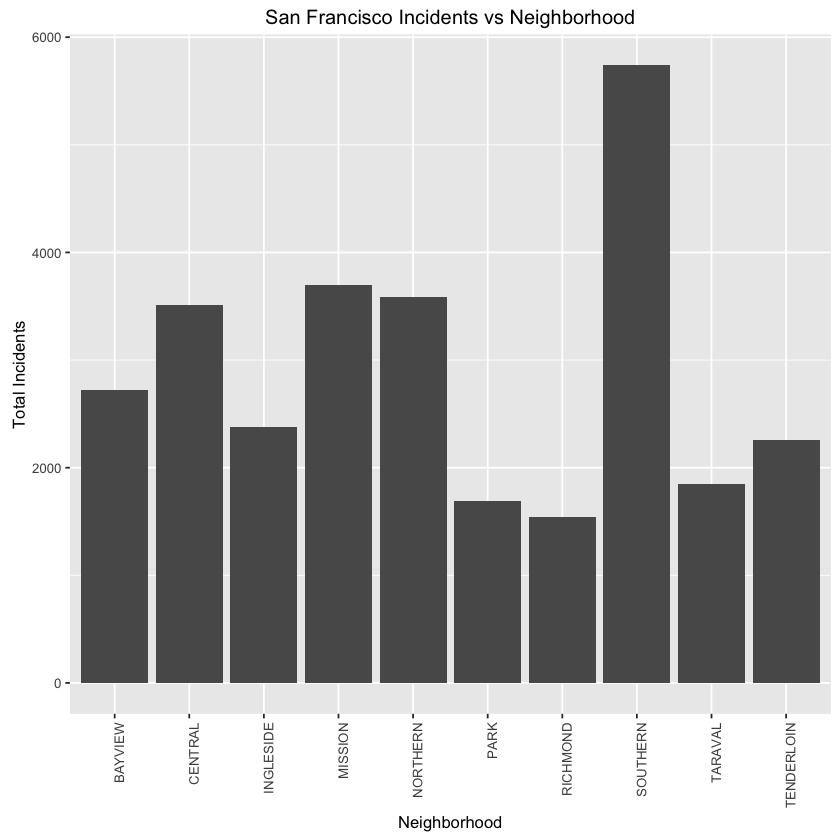

In [6]:
barplot <- ggplot(SF, aes(PdDistrict)) + 
             geom_bar() + 
             xlab("Neighborhood") +
             ylab("Total Incidents") + 
             ggtitle("San Francisco Incidents vs Neighborhood") +
             theme(text = element_text(size=10), 
                   axis.text.x = element_text(angle = 90, hjust = 1))

barplot

As you can see from the bar graph above neighborhoods with the highest incidents occurs in the SOUTHERN areas followed by MISSION second and NORTHERN third.

For the following next question:  

> _**Which incidents are most common in the city center?**_

We will first use location which refers to a spatial interval variable to get an understanding of overall crimes and the coordinates of the city center. 

The visualization that I will use to answer the location question which suits the spatial coordinates (interval) vs the  overall crimes (quantitative) is a **contour map**.

Then we will use the coordinates from the contour map to filter all crime within the area located in the center of the city and produce a bar graph to compare the most common ones.  This bar graph is ideal because the most common type of incident are nominal and quantitative variables.  

It is possible to throw all this information on one contour map, but would be very hard to interpret.

Let's create a contour map with longitude (X) on the x-axis and latitude (Y) on the y-axis.

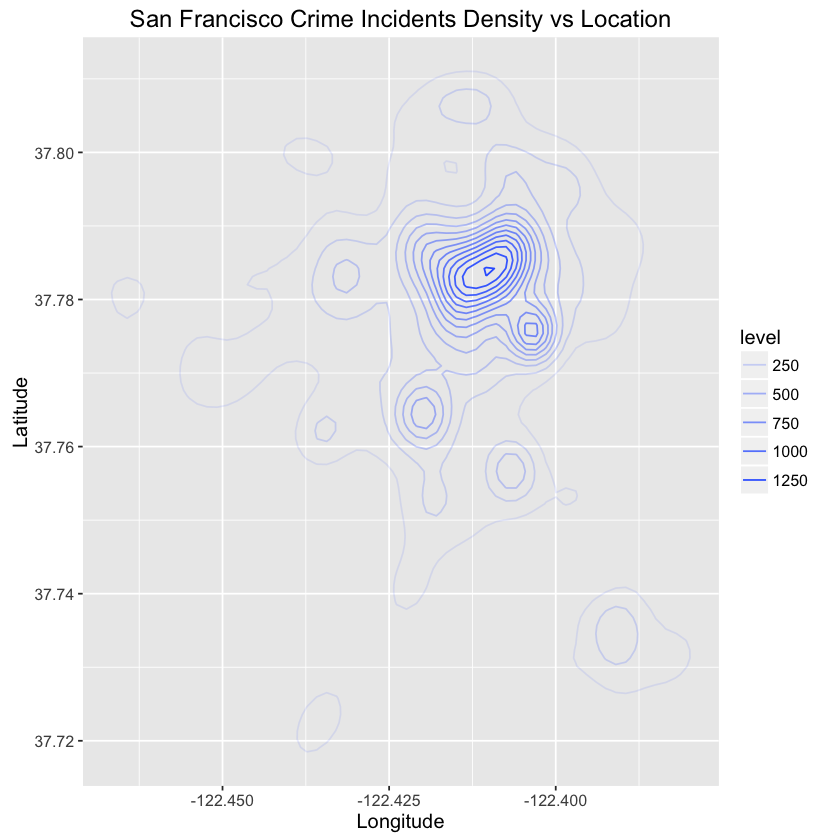

In [7]:
contour.plot <- ggplot(SF, aes(X, Y)) +
                 stat_density2d(geom="contour", aes(alpha=..level..)) +
                 xlab("Longitude") +
                 ylab("Latitude") + 
                 ggtitle("San Francisco Crime Incidents Density vs Location") +
                 theme(text = element_text(size=12))

contour.plot

As you can see from the contour map, the majority of the incidents reside in the northeast of the center of the city, while the second biggest hotspot is the center of the city itself.

Let's designate the center of the city as:  
 _(37.76 < latitude < 37.77, -122.425 < longitude < -122.4125)_
 
We will use a filter for the data that captures all of the incidents within these coordinates.

In [9]:
city.center <- SF[SF[,"X"] > -122.425 & SF[,"X"] < -122.4125 &
                  SF[,"Y"] > 37.76 & SF[,"Y"] < 37.77,]
nrow(city.center)
nrow(SF)

[1] 1278

[1] 28993

We have 1278 out of 28993 incidents that fulfill the criteria.  
Now let's create the bar plot with Category (type of incidents) on the x-axis and number of incidents on the y-axis of only the **city center incidents**.

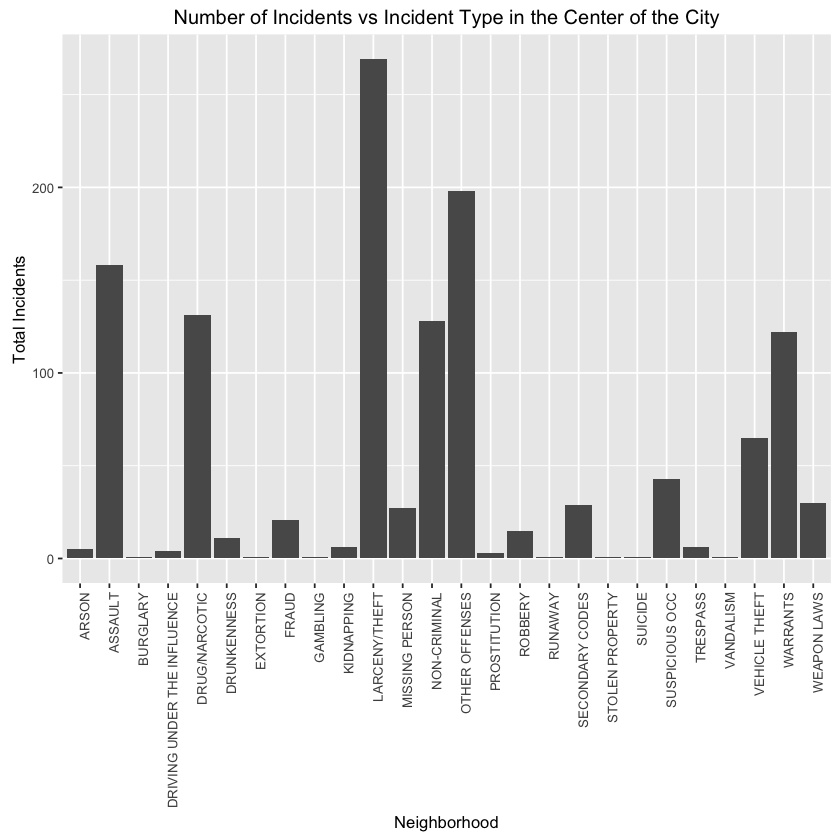

In [13]:
barplot2 <- ggplot(city.center, aes(Category)) + 
             geom_bar() + 
             xlab("Neighborhood") +
             ylab("Total Incidents") + 
             ggtitle("Number of Incidents vs Incident Type in the Center of the City") +
             theme(text = element_text(size=10), 
                   axis.text.x = element_text(angle = 90, hjust = 1))

barplot2

From the chart above it shows that the top three incidents ranked from most occuring are:
1. LARCENY/THEFT
2. OTHER OFFENSES
3. ASSAULT

For the last question:  

> _**In what areas or neighborhoods are robberies or thefts most common?**_

We again can use the the contour map as well as the bar plot to get an answer.

We will filter the data again to get all of the incidents having to do with robberies and thefts.

In [14]:
robbery <- SF[SF[,"Category"] == "ROBBERY",]
burglary <- SF[SF[,"Category"] == "BURGLARY",]
larceny.theft <- SF[SF[,"Category"] == "LARCENY/THEFT",]
vehicle.theft <- SF[SF[,"Category"] == "VEHICLE THEFT",]


In [19]:
robbery.theft <- rbind(robbery, burglary, larceny.theft, vehicle.theft)

Then we create another contour map using the filtered data this time.

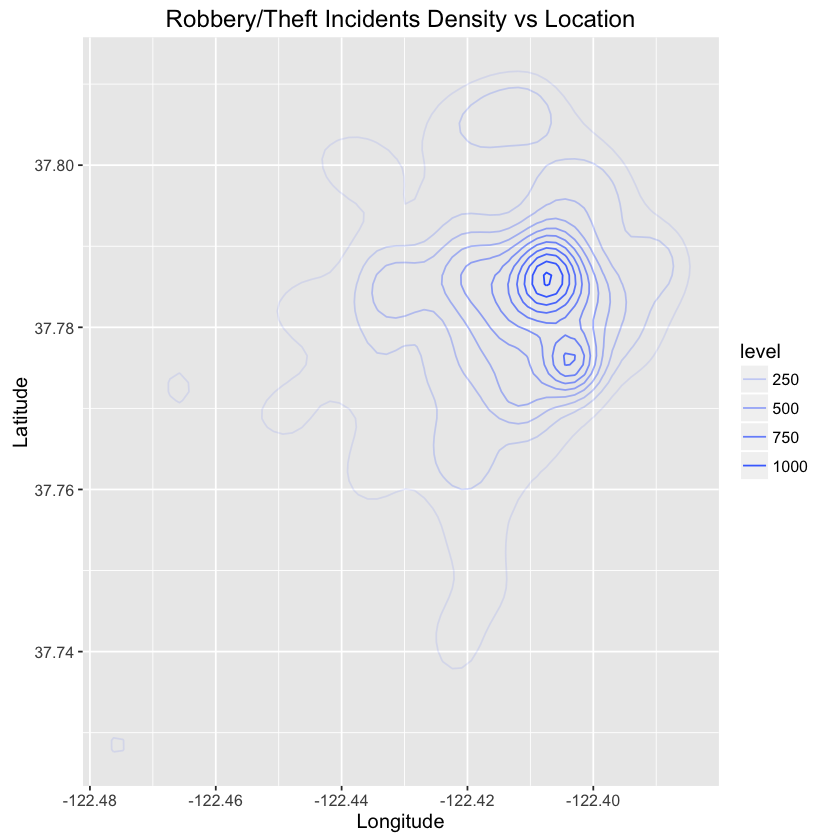

In [21]:
robbery.theft.contour.plot <- ggplot(robbery.theft, aes(X, Y)) +
                              stat_density2d(geom="contour", aes(alpha=..level..)) +
                              xlab("Longitude") +
                              ylab("Latitude") + 
                              ggtitle("Robbery/Theft Incidents Density vs Location") +
                              theme(text = element_text(size=12))

robbery.theft.contour.plot

From the contour plot we se that the robberies and thefts are occuring northeast from the city center.  

Let's create anotherbar plot of neighborhoods vs number of incidents using the filtered data.

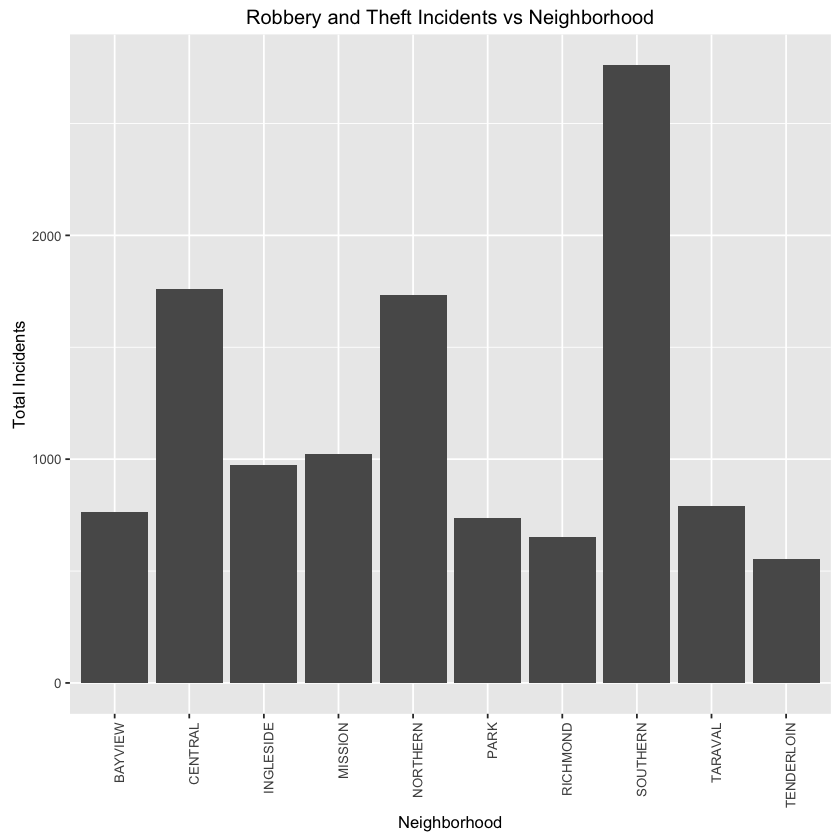

In [22]:
barplot2 <- ggplot(robbery.theft, aes(PdDistrict)) + 
             geom_bar() + 
             xlab("Neighborhood") +
             ylab("Total Incidents") + 
             ggtitle("Robbery and Theft Incidents vs Neighborhood") +
             theme(text = element_text(size=10), 
                   axis.text.x = element_text(angle = 90, hjust = 1))

barplot2

From the chart above it shows that the top three neighborhoods ranked from most occuring robberies and thefts are:
1. SOUTHERN
2. CENTRAL
3. NORTHERN